In [91]:
#maite rivas's branch file

In [92]:
#Importing dependencies and setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

#Kept getting a random warning so had to immport the warning ignore :(
import warnings
warnings.filterwarnings('ignore')

from pprint import pprint
from scipy.stats import linregress
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#import spotify keys
from config import client_id
from config import client_secret

In [3]:
#from: https://stmorse.github.io/journal/spotify-api.html

AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [4]:
#from: https://stmorse.github.io/journal/spotify-api.html

#base URL for Spotify API
base_url = 'https://api.spotify.com/v1/'

#In order to access, we send a properly formed GET request to the API server, with our access_token in the header. Let’s save this header info now, in the following very specific format:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [5]:
#import global top songs csv
global_songs_df = pd.read_csv("resources/global-weekly-2022-06-02.csv")

#extracting track id (removing "spotify:track:")
track_id_series = global_songs_df.uri.str[14:]

#convert to df and rename column
track_id_df = track_id_series.to_frame().rename(columns={"uri":"track_id"})

#merge dfs
cleaned_global_df = global_songs_df.merge(track_id_df, how="inner", left_index=True, right_index=True)

#pare down columns
cleaned_global_df = cleaned_global_df[["rank", "track_id", "artist_names", "track_name", "peak_rank", "previous_rank", "weeks_on_chart", "streams"]]
cleaned_global_df

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704
...,...,...,...,...,...,...,...,...
195,196,1WCEAGGRD066z2Q89ObXTq,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,178,195,4,5568564
196,197,2N8m6CYs74qQO4mjVcXO30,Tones And I,Dance Monkey,1,-1,148,5556591
197,198,5JCoSi02qi3jJeHdZXMmR8,Olivia Rodrigo,favorite crime,11,197,48,5552673
198,199,6lX6l7OuA3qrnIRfdsr0dw,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,48,168,28,5552315


In [6]:
#empty lists to store song data
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
id_num = []
track_href = []
analysis_url = []
duration_mins = []
time_signature = []

In [7]:
for t in cleaned_global_df["track_id"]:
    response = requests.get(base_url + 'audio-features/' + t, headers=headers).json()
    
    #fill in track info for each audio feature / empty list
    danceability.append(response["danceability"])
    energy.append(response["energy"])
    key.append(response["key"])
    loudness.append(response["loudness"])
    mode.append(response["mode"])
    speechiness.append(response["speechiness"])
    acousticness.append(response["acousticness"])
    instrumentalness.append(response["instrumentalness"])
    liveness.append(response["liveness"])
    valence.append(response["valence"])
    tempo.append(response["tempo"])
    id_num.append(response["id"])
    track_href.append(response["track_href"])
    analysis_url.append(response["analysis_url"])    
    #duration recorded in api in milliseconds, converting to minutes here
    duration_mins.append(round((response["duration_ms"] / 60000),2))
    time_signature.append(response["time_signature"])
    

In [8]:
songs_dict = {
    "track_id": id_num,
    "danceability": danceability,
    "energy": energy,
    "key": key,
    "loudness": loudness,
    "mode": mode,
    "speechiness": speechiness,
    "acousticness": acousticness,
    "instrumentalness": instrumentalness,
    "liveness": liveness,
    "valence": valence,
    "tempo": tempo,
    "duration_mins": duration_mins,
    "time_signature": time_signature,
    "track_href": track_href,
    "analysis_url": analysis_url
    
}

song_info_df = pd.DataFrame(songs_dict)
song_info_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3k3NWokhRRkEPhCzPmV8TW,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,75FEaRjZTKLhTrFGsfMUXR,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,1IHWl5LamUGEuP4ozKQSXZ,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [9]:
full_track_data = cleaned_global_df.merge(song_info_df, how='inner', on="track_id")

In [10]:
full_track_data.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [11]:
top_song_info_df = full_track_data[["rank", "artist_names", "track_name", "weeks_on_chart", "streams", 
                                    "danceability", "energy", "liveness"]]

top_song_info_df

,rank,artist_names,track_name,weeks_on_chart,streams,danceability,energy,liveness
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260
...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630


In [12]:
new_songs_df = top_song_info_df.set_index('rank')
new_songs_df

,artist_names,track_name,weeks_on_chart,streams,danceability,energy,liveness
rank,,,,,,,
1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280
4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604
5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260
...,...,...,...,...,...,...,...
196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580
197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490
198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470


In [13]:
new_songs_df = top_song_info_df.rename(columns={"artist_names":"Artist Names", "track_name":"Track Name", 
                                                "weeks_on_chart":"Weeks on Chart"})

In [14]:
#Scatterplot for songs and danceability
danceability_df = new_songs_df[["Artist Names", "Track Name", "danceability"]]
#danceability_df

In [15]:
dance_df = danceability_df.reset_index(drop=True)

In [16]:
#dance_df

The correlation between danceability and streams is 0.10063


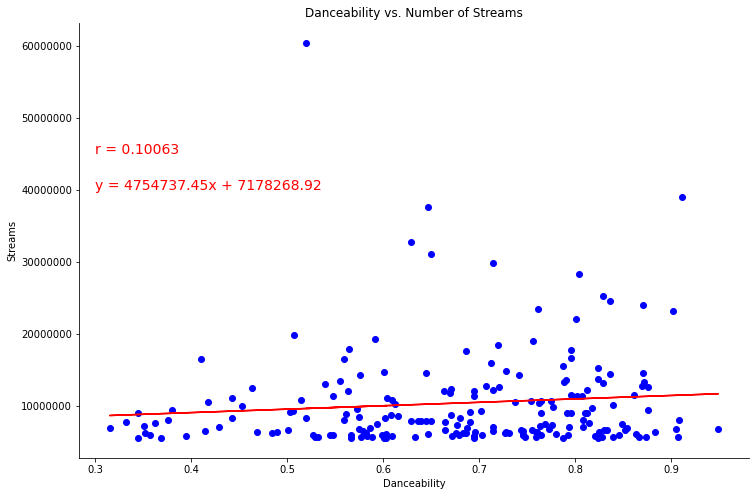

In [83]:
#Looking at the relationship between danceability and streams of global top songs 

#make the columns in question numeric 
new_songs_df['danceability'] = pd.to_numeric(new_songs_df['danceability'])
new_songs_df['streams'] = pd.to_numeric(new_songs_df['streams'])

#create a scatter plot to see correlation between variables 
xvalues = new_songs_df["danceability"]
yvalues = new_songs_df["streams"]
              
#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between danceability and streams is {round(rvalue,5)}")

#Clean up plot with labels and title
plt.title("Danceability vs. Number of Streams")
plt.xlabel('Danceability')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain')

#Add line equation and r value
plt.annotate(line_eq,(0.3,40000000),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.3,45000000),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Danceability_vs_Streams', dpi = 300)


#display the graph with the correlation number 

plt.show()

The correlation between energy and streams is 0.0083


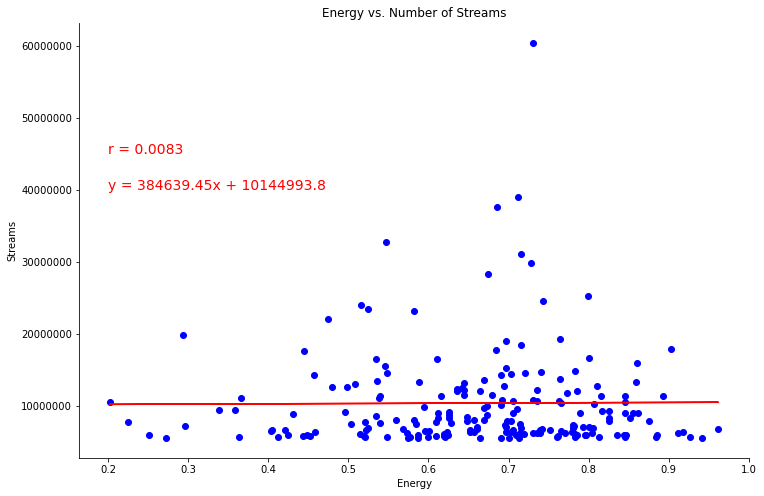

In [84]:
#Looking at the relationship between energy and streams of global top songs 

#make the columns in question numeric 
new_songs_df['energy'] = pd.to_numeric(new_songs_df['energy'])
new_songs_df['streams'] = pd.to_numeric(new_songs_df['streams'])

#create a scatter plot to see correlation between variables 
xvalues = new_songs_df["energy"]
yvalues = new_songs_df["streams"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between energy and streams is {round(rvalue,5)}")

#Clean up plot with labels
plt.title("Energy vs. Number of Streams")
plt.xlabel('Energy')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain')

plt.annotate(line_eq,(0.2,40000000),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.2,45000000),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Energy_vs_Streams', dpi = 300)


#display the graph with the correlation number 

plt.show()

The correlation between liveness and streams is 0.0865


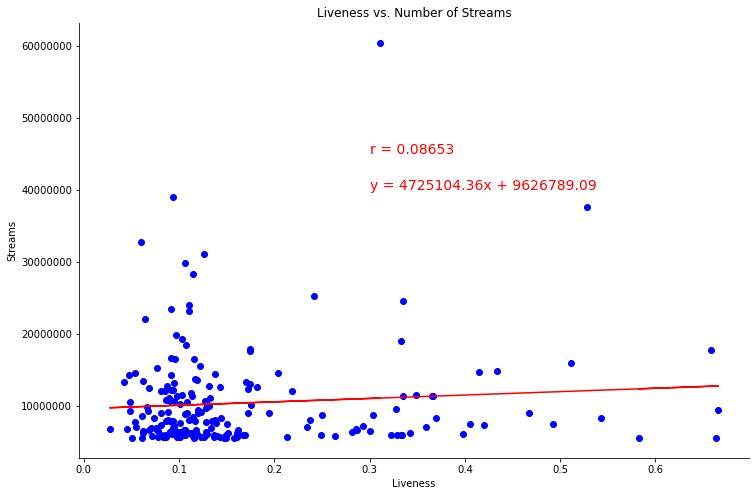

In [78]:
#Looking at the relationship between liveness and streams of global top songs 

#make the columns in question numeric 
new_songs_df['liveness'] = pd.to_numeric(new_songs_df['liveness'])
new_songs_df['streams'] = pd.to_numeric(new_songs_df['streams'])

#create a scatter plot to see correlation between variables 
xvalues = new_songs_df["liveness"]
yvalues = new_songs_df["streams"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between liveness and streams is {round(rvalue,4)}")

#Clean up plot and display labels
plt.title("Liveness vs. Number of Streams")
plt.xlabel('Liveness')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain')

plt.annotate(line_eq,(0.3,40000000),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.3,45000000),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Liveness_vs_Streams', dpi = 300)


#display the graph with the correlation number 

plt.show()

In [76]:
#Displaying DataFrame for reference
new_songs_df

,rank,Artist Names,Track Name,Weeks on Chart,streams,danceability,energy,liveness,rank_bins
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110,1 to 50
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933,1 to 50
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280,1 to 50
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604,1 to 50
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260,1 to 50
...,...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580,151 to 200
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490,151 to 200
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470,151 to 200
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630,151 to 200


In [75]:
#Display correlation values between variables for reference
songs_corr_df = new_songs_df.corr()

#Dropping unnecessary columns
songs_corr_df = songs_corr_df.drop(columns={"rank", "Weeks on Chart"})
songs_corr_df

,streams,danceability,energy,liveness
rank,-0.748321,-0.123161,0.000271,-0.034471
Weeks on Chart,-0.254571,-0.159204,-0.068475,-0.059519
streams,1.000000,0.100629,0.008298,0.086533
danceability,0.100629,1.000000,0.186564,0.024157
energy,0.008298,0.186564,1.000000,0.048307
liveness,0.086533,0.024157,0.048307,1.000000


The correlation between danceability and energy is 0.1866


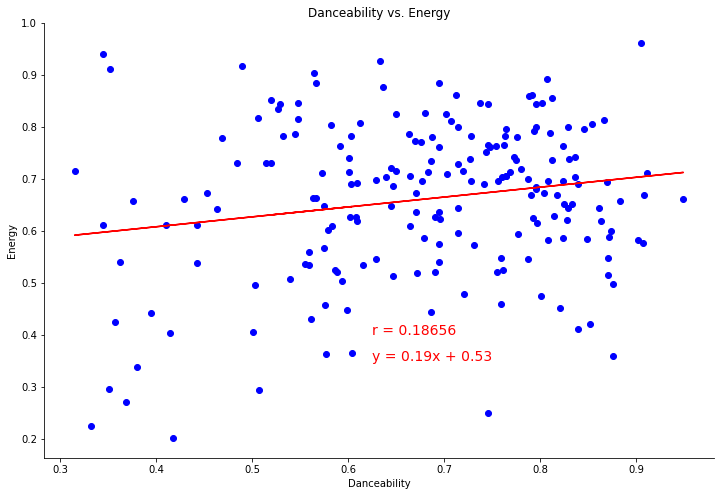

In [64]:
#Looking at the relationship between danceability and energy of global top songs 

#make the columns in question numeric 
new_songs_df['danceability'] = pd.to_numeric(new_songs_df['danceability'])
new_songs_df['energy'] = pd.to_numeric(new_songs_df['energy'])

#create a scatter plot to see correlation between variables 
xvalues = new_songs_df["danceability"]
yvalues = new_songs_df["energy"]

#find correlation between the variables and print
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between danceability and energy is {round(rvalue,4)}")

#Clean chart and display appropriate titles/labels
plt.title("Danceability vs. Energy")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.ticklabel_format(style='plain')

plt.annotate(line_eq,(0.625,0.35),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.625,0.4),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Danceability_vs_Energy', dpi = 300)


plt.show()

In [29]:
#Displaying danceability values and dtype
new_songs_df.iloc[:,5]

0      0.520
1      0.911
2      0.647
3      0.629
4      0.650
       ...  
195    0.601
196    0.824
197    0.369
198    0.787
199    0.603
Name: danceability, Length: 200, dtype: float64

In [30]:
#Getting the statistical values of the variables danceability, energy, liveness, and streams
stats_songs_df = new_songs_df.describe()
stats_songs_df = stats_songs_df.drop(columns={"rank", "Weeks on Chart"})
stats_songs_df

,streams,danceability,energy,liveness
count,2.000000e+02,200.000000,200.000000,200.000000
mean,1.039922e+07,0.677420,0.660955,0.163475
std,6.864669e+06,0.145284,0.148103,0.125716
min,5.548718e+06,0.315000,0.202000,0.027200
25%,6.284778e+06,0.578500,0.576500,0.090875
50%,7.982727e+06,0.695000,0.685000,0.115000
75%,1.205175e+07,0.795000,0.767250,0.172500
max,6.042086e+07,0.949000,0.962000,0.666000


In [31]:
#Binning top songs to compare mean/avg values between liveness, danceability, and energy
bins = [0, 50, 100, 150, 200]
rank_labels = ["1 to 50", "51 to 100", "101 to 150", "151 to 200"]

new_songs_df["rank_bins"] = pd.cut(new_songs_df["rank"], bins, labels=rank_labels)
new_songs_df

,rank,Artist Names,Track Name,Weeks on Chart,streams,danceability,energy,liveness,rank_bins
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110,1 to 50
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933,1 to 50
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280,1 to 50
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604,1 to 50
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260,1 to 50
...,...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580,151 to 200
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490,151 to 200
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470,151 to 200
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630,151 to 200


In [32]:
#Displaying the mean by variables with groupby and mean function
avg_rank_df = new_songs_df.groupby('rank_bins')[['streams','danceability','energy','liveness']].mean()
avg_rank_df.reset_index(inplace=True)
avg_rank_df = avg_rank_df.rename(columns = {"rank_bins": "Song Rank (Top 200)"})
avg_rank_df

,Song Rank (Top 200),streams,danceability,energy,liveness
0,1 to 50,18956212.42,0.71730,0.65278,0.165058
1,51 to 100,9798418.64,0.65972,0.67020,0.175716
2,101 to 150,6986239.46,0.67762,0.65394,0.148804
3,151 to 200,5856022.14,0.65504,0.66690,0.164320


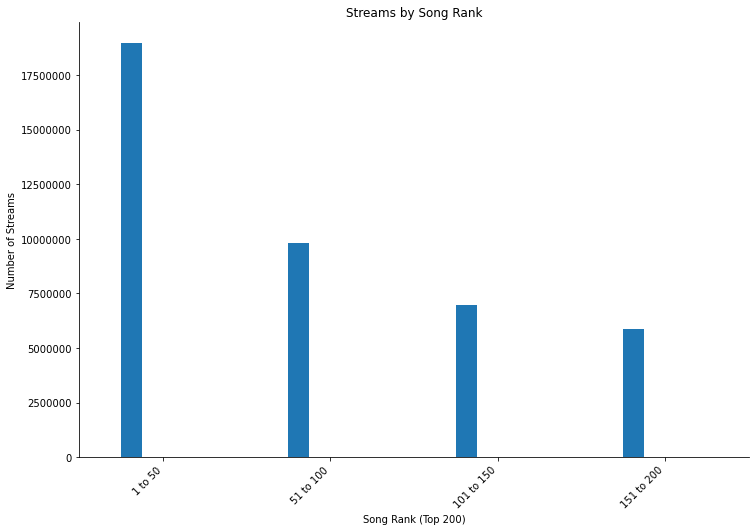

In [33]:
#Testing with binning using streams
stream_bins_fig = avg_rank_df.plot(x="Song Rank (Top 200)", kind="bar",title="Streams by Song Rank", 
                                xlabel="Song Rank (Top 200)", ylabel="Number of Streams", rot=45, legend=None)

#(x='Song Rank', y='streams', kind="bar")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha="right")

#no need to save, not using this figure
#plt.savefig("images/streams_bins.png",bbox_inches='tight', dpi=300)

plt.show()

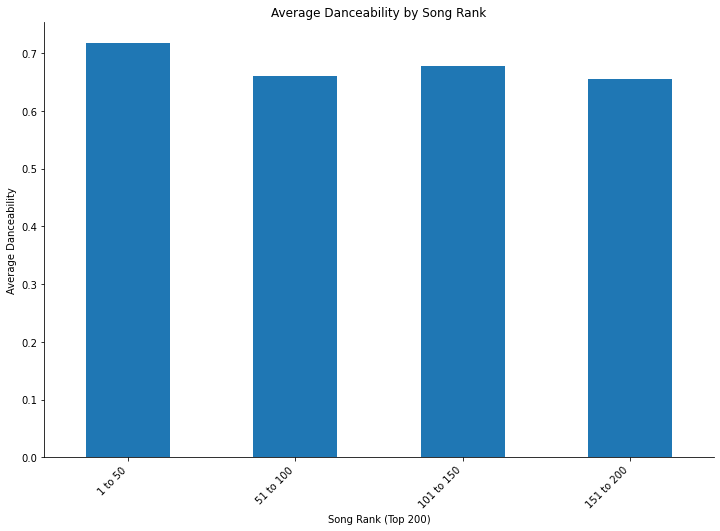

In [74]:
#Grouping danceability means by ranks
dance_fig = avg_rank_df.plot(x='Song Rank (Top 200)', y='danceability', kind="bar", title="Average Danceability by Song Rank", 
                                xlabel="Song Rank (Top 200)", ylabel="Average Danceability", rot=45, legend=None)

plt.xticks(ha="right")

#save as png
plt.savefig("images/danceability_by_rank.png", dpi=300)
plt.show()

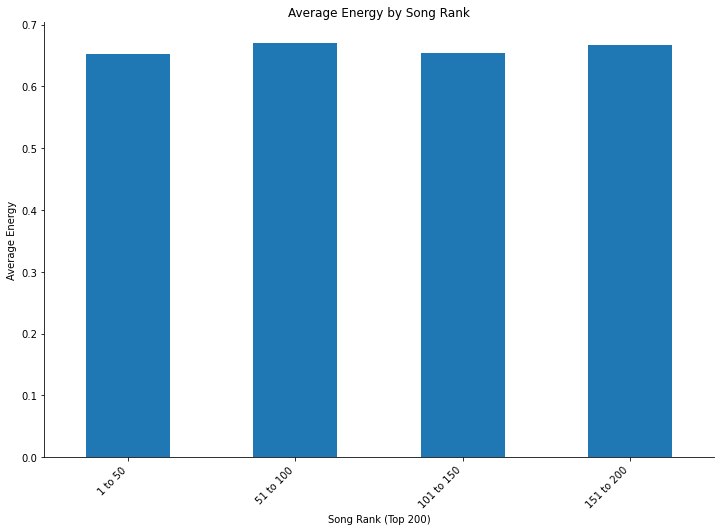

In [73]:
#Grouping energy means by ranks
energy_fig = avg_rank_df.plot(x='Song Rank (Top 200)', y='energy', kind="bar", title="Average Energy by Song Rank", 
                                xlabel="Song Rank (Top 200)", ylabel="Average Energy", rot=45, legend=None)

plt.xticks(ha="right")

#save as png
plt.savefig("images/energy_by_rank.png", dpi=300)
plt.show()

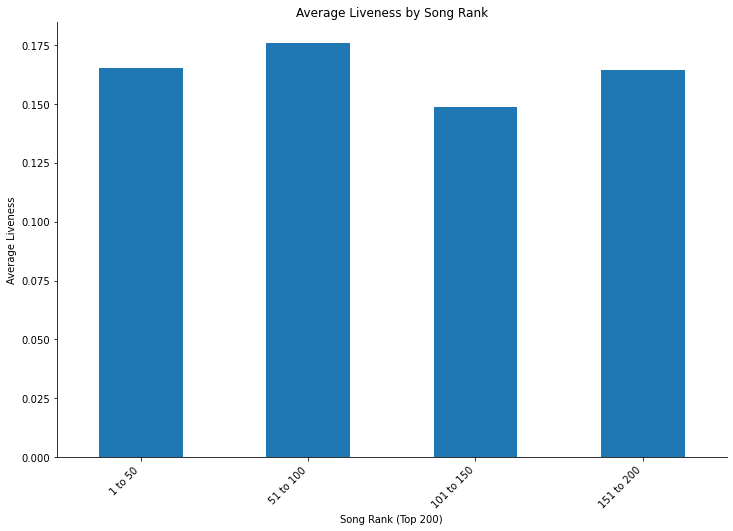

In [72]:
#Grouping liveness means by ranks
liveness_fig = avg_rank_df.plot(x='Song Rank (Top 200)', y='liveness', kind="bar", title="Average Liveness by Song Rank", 
                                xlabel="Song Rank (Top 200)", ylabel="Average Liveness", rot=45, legend=None)

plt.xticks(ha="right")

#save as png
plt.savefig("images/liveness_by_rank.png", dpi=300)
plt.show()

In [80]:
#dropping unnecessary columns of data
song_variable_df = new_songs_df.drop(columns = {"Artist Names", "Track Name", "Weeks on Chart", "rank"})
song_variable_df

,streams,danceability,energy,liveness,rank_bins
0,60420855,0.520,0.731,0.3110,1 to 50
1,39026161,0.911,0.712,0.0933,1 to 50
2,37623538,0.647,0.686,0.5280,1 to 50
3,32763806,0.629,0.547,0.0604,1 to 50
4,31126704,0.650,0.715,0.1260,1 to 50
...,...,...,...,...,...
195,5568564,0.601,0.713,0.1580,151 to 200
196,5556591,0.824,0.587,0.1490,151 to 200
197,5552673,0.369,0.272,0.1470,151 to 200
198,5552315,0.787,0.700,0.6630,151 to 200


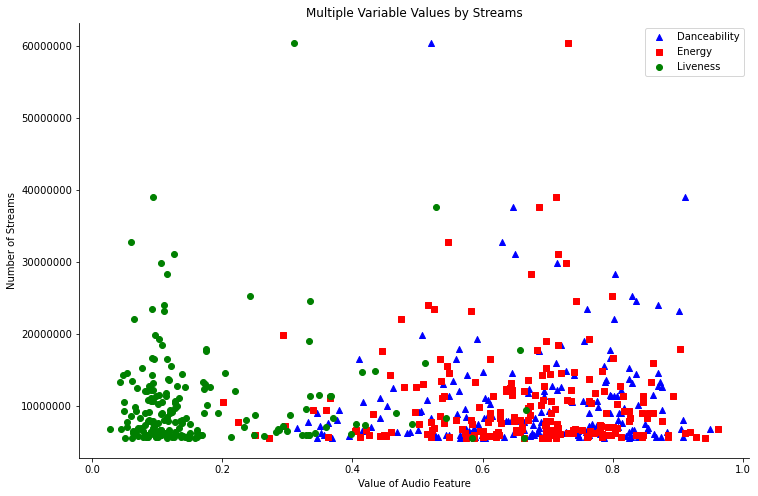

In [81]:
#Making a scatterplot with multiple columns of data
xvalue1 = song_variable_df["danceability"]
xvalue2 = song_variable_df["energy"]
xvalue3 = song_variable_df["liveness"]
yvalues = song_variable_df["streams"]

#Saving scatterplot to figure to save as png later
multiple_scatter_fig = plt.figure()

#Plotting multiple columns/variables
plt.scatter(xvalue1,yvalues, c='b', marker='^', label='Danceability')
plt.scatter(xvalue2, yvalues, c='r', marker='s', label='Energy')
plt.scatter(xvalue3, yvalues, c='g', marker='o', label='Liveness')

#Cleaning up chart with proper labels
plt.title("Multiple Variable Values by Streams") 
plt.xlabel('Value of Audio Feature')
plt.ylabel('Number of Streams')
plt.ticklabel_format(style='plain')

#Adding legend to identify variables, specifying best location
plt.legend(loc='best')
#plt.annotate(f"r = {round(rvalue,5)}",(0.3,40000000),fontsize=14,color="black")

plt.savefig('images/multiple_scatters.png', bbox_inches='tight', dpi=300)

plt.show()

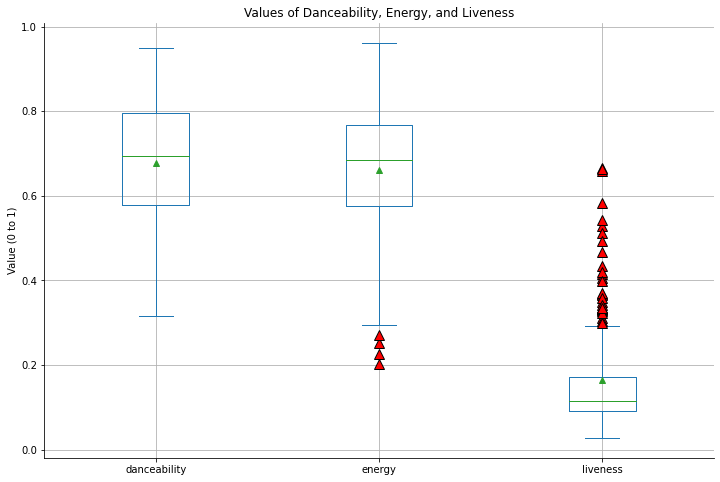

In [99]:
#Creating a boxplot with Danceability, Energy, and Liveness (check unit 5.3 class notes)
flierprops = dict(marker='^', markerfacecolor='red', markersize=10)
ax = new_songs_df[['danceability', 'energy','liveness']].plot(kind='box', title='Values of Danceability, Energy, and Liveness', 
                                                                    flierprops=flierprops, showmeans=True)
ax.set_ylabel('Value (0 to 1)')
#plt.ylim()

plt.grid()
plt.savefig("images/song_var_boxplot.png",bbox_inches='tight', dpi=200)
plt.show()

The lower quartile of Danceability is: 0.58
The upper quartile of Danceability is: 0.8
The interquartile range of Danceability is: 0.22
The median of Danceability is: 0.695 
Values below 0.25 could be outliers.
Values above 1.13 could be outliers.


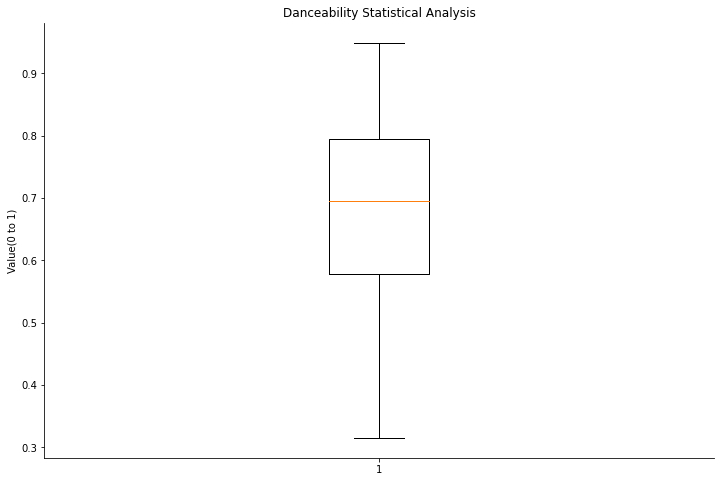

In [101]:
#Create Danceability boxplot to output IQR values
#calculate quartiles of dance
dance_quartiles = new_songs_df.danceability.quantile([.25,.5,.75])
dance_lowerq = dance_quartiles[0.25].round(2)
dance_upperq = dance_quartiles[0.75].round(2)
dance_iqr = (dance_upperq-dance_lowerq).round(2)
dance_lower_bound = (dance_lowerq - (1.5*dance_iqr)).round(2)
dance_upper_bound = (dance_upperq + (1.5*dance_iqr)).round(2)
   
print(f"The lower quartile of Danceability is: {dance_lowerq}")
print(f"The upper quartile of Danceability is: {dance_upperq}")
print(f"The interquartile range of Danceability is: {dance_iqr}")
print(f"The median of Danceability is: {dance_quartiles[0.5]} ")
print(f"Values below {dance_lower_bound} could be outliers.")
print(f"Values above {dance_upper_bound} could be outliers.")

#create boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)
fig1,ax1 = plt.subplots()
ax1.set_title('Danceability Statistical Analysis')
ax1.set_ylabel('Value(0 to 1)')
ax1.boxplot(new_songs_df["danceability"], flierprops=flierprops)

#save as png
plt.savefig("images/dance_boxplot.png")
plt.show()

The lower quartile of Energy is: 0.58
The upper quartile of Energy is: 0.77
The interquartile range of Energy is: 0.19
The median of Energy is: 0.685 
Values below 0.29 could be outliers.
Values above 1.06 could be outliers.


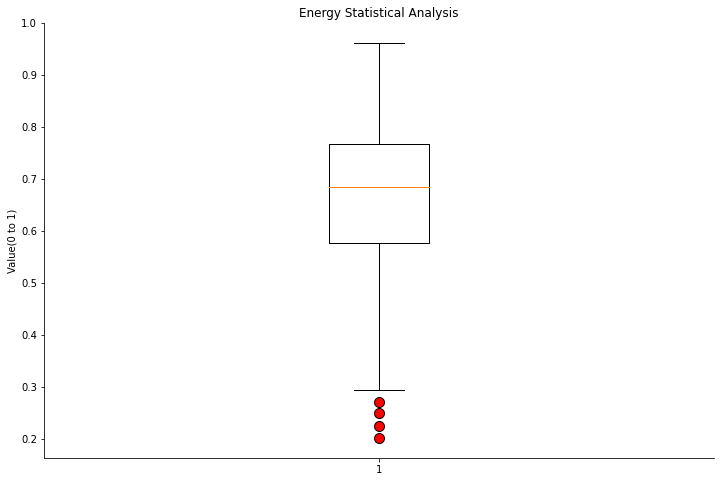

In [106]:
#Create Energy boxplot to output IQR values
#calculate quartiles of energy
energy_quartiles = new_songs_df.energy.quantile([.25,.5,.75])
energy_lowerq = energy_quartiles[0.25].round(2)
energy_upperq = energy_quartiles[0.75].round(2)
energy_iqr = (energy_upperq-energy_lowerq).round(2)
energy_lower_bound = (energy_lowerq - (1.5*energy_iqr)).round(2)
energy_upper_bound = (energy_upperq + (1.5*energy_iqr)).round(2)
   
print(f"The lower quartile of Energy is: {energy_lowerq}")
print(f"The upper quartile of Energy is: {energy_upperq}")
print(f"The interquartile range of Energy is: {energy_iqr}")
print(f"The median of Energy is: {energy_quartiles[0.5]} ")
print(f"Values below {energy_lower_bound} could be outliers.")
print(f"Values above {energy_upper_bound} could be outliers.")

#create boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)
fig2,ax2 = plt.subplots()
ax2.set_title('Energy Statistical Analysis')
ax2.set_ylabel('Value(0 to 1)')
ax2.boxplot(new_songs_df["energy"], flierprops=flierprops)
#save as png
plt.savefig("images/energy_boxplot.png")
plt.show()

The lower quartile of Liveness is: 0.09
The upper quartile of Liveness is: 0.17
The interquartile range of Liveness is: 0.08
The median of Liveness is: 0.115 
Values below -0.03 could be outliers.
Values above 0.29 could be outliers.


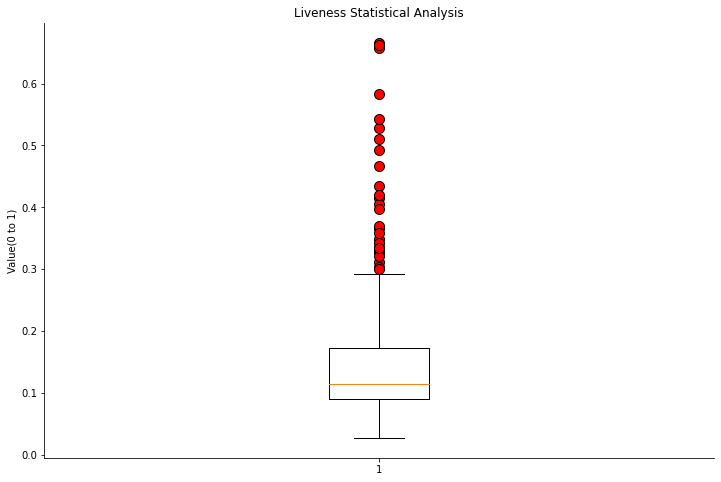

In [107]:
#Create Liveness boxplot to output IQR values
#calculate quartiles of liveness
liveness_quartiles = new_songs_df.liveness.quantile([.25,.5,.75])
liveness_lowerq = liveness_quartiles[0.25].round(2)
liveness_upperq = liveness_quartiles[0.75].round(2)
liveness_iqr = (liveness_upperq-liveness_lowerq).round(2)
liveness_lower_bound = (liveness_lowerq - (1.5*liveness_iqr)).round(2)
liveness_upper_bound = (liveness_upperq + (1.5*liveness_iqr)).round(2)
   
print(f"The lower quartile of Liveness is: {liveness_lowerq}")
print(f"The upper quartile of Liveness is: {liveness_upperq}")
print(f"The interquartile range of Liveness is: {liveness_iqr}")
print(f"The median of Liveness is: {liveness_quartiles[0.5]} ")
print(f"Values below {liveness_lower_bound} could be outliers.")
print(f"Values above {liveness_upper_bound} could be outliers.")

#create boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)
fig3,ax3 = plt.subplots()
ax3.set_title('Liveness Statistical Analysis')
ax3.set_ylabel('Value(0 to 1)')
ax3.boxplot(new_songs_df["liveness"], flierprops=flierprops)

#save as png
plt.savefig("images/liveness_boxplot.png")
plt.show()